In [99]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('./data/arch_benchmark/results.csv')
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing
0,yolov8s,11137922,28.657715,0.004394,123.138781,1.859140
1,yolov8s-p2,10638536,36.969011,0.003550,155.620027,2.021368
2,yolov8s-p234,7410434,34.383258,0.003779,150.355697,2.149949
3,yolov8s-p2-late_decoup,9493448,25.690470,0.004168,117.451518,2.106433
4,yolov8s-p2-late_decoupV2,9937096,30.888499,0.003176,125.792956,1.710086
5,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,134.491677,1.918406
6,yolov8s-p2-pconv_bone,8978024,32.095590,0.003679,141.670268,2.135594
7,yolov8s-p2-pconvema_bone,8979158,32.216320,0.003774,156.491299,1.872985
8,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003834,144.328594,1.934419


In [107]:
# COMPUTE FPS/Latency
df['Latency'] = df['Preprocessing'] + df['Postprocessing'] + df['Inference']
df['FPS'] = 1000/df['Latency']
df.sort_values(by='FPS', ascending=False, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
3,yolov8s-p2-late_decoup,9493448,25.690470,0.004168,117.451518,2.106433,119.562118,8.363853
0,yolov8s,11137922,28.657715,0.004394,123.138781,1.859140,125.002315,7.999852
4,yolov8s-p2-late_decoupV2,9937096,30.888499,0.003176,125.792956,1.710086,127.506218,7.842755
5,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,134.491677,1.918406,136.413183,7.330670
6,yolov8s-p2-pconv_bone,8978024,32.095590,0.003679,141.670268,2.135594,143.809540,6.953642
8,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003834,144.328594,1.934419,146.266847,6.836819
2,yolov8s-p234,7410434,34.383258,0.003779,150.355697,2.149949,152.509425,6.556972
1,yolov8s-p2,10638536,36.969011,0.003550,155.620027,2.021368,157.644944,6.343369
7,yolov8s-p2-pconvema_bone,8979158,32.216320,0.003774,156.491299,1.872985,158.368058,6.314405


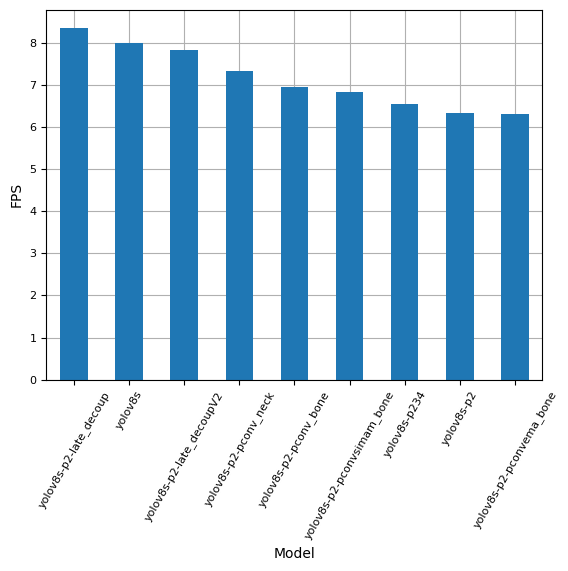

In [108]:
df.plot.bar(y='FPS', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['FPS'].max()), 1), grid=True, zorder=2, legend=False, ylabel='FPS', fontsize=8)
None

In [109]:
df.sort_values(by='Inference', ascending=True, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
3,yolov8s-p2-late_decoup,9493448,25.690470,0.004168,117.451518,2.106433,119.562118,8.363853
0,yolov8s,11137922,28.657715,0.004394,123.138781,1.859140,125.002315,7.999852
4,yolov8s-p2-late_decoupV2,9937096,30.888499,0.003176,125.792956,1.710086,127.506218,7.842755
5,yolov8s-p2-pconv_neck,8978024,32.095590,0.003099,134.491677,1.918406,136.413183,7.330670
6,yolov8s-p2-pconv_bone,8978024,32.095590,0.003679,141.670268,2.135594,143.809540,6.953642
8,yolov8s-p2-pconvsimam_bone,8978024,32.095590,0.003834,144.328594,1.934419,146.266847,6.836819
2,yolov8s-p234,7410434,34.383258,0.003779,150.355697,2.149949,152.509425,6.556972
1,yolov8s-p2,10638536,36.969011,0.003550,155.620027,2.021368,157.644944,6.343369
7,yolov8s-p2-pconvema_bone,8979158,32.216320,0.003774,156.491299,1.872985,158.368058,6.314405


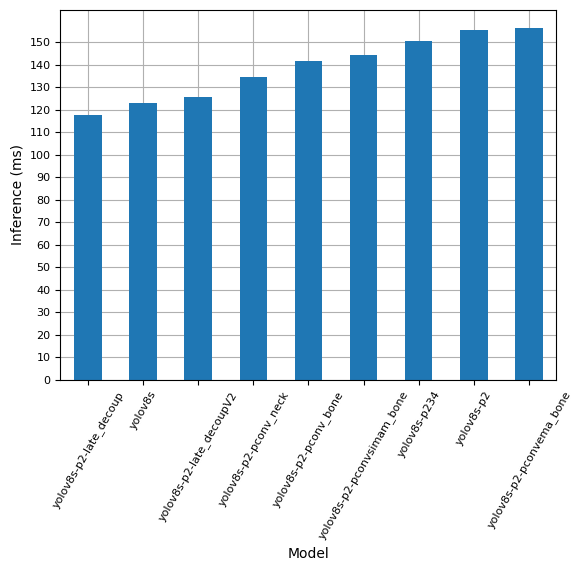

In [113]:
df.plot.bar(y='Inference', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['Inference'].max()), 10), grid=True, zorder=2, legend=False, ylabel='Inference (ms)', fontsize=8)
None